# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 - CRISP-DM: Entendimento do Negócio

A primeira etapa do **CRISP-DM (Cross Industry Standard Process for Data Mining)** é dedicada ao **entendimento do negócio**.  
Antes de qualquer análise ou modelagem, é fundamental compreender o contexto do problema, os objetivos estratégicos da organização e como a solução baseada em dados poderá gerar valor.

No nosso caso, estamos trabalhando com uma **base de dados de clientes de uma instituição financeira**.  
O objetivo principal é **desenvolver um modelo preditivo capaz de estimar, com a maior precisão e consistência possível, o valor da variável *"renda"* de cada cliente**.  

Essa previsão é relevante para a instituição, pois auxilia em processos como:  
- Avaliação de crédito e definição de limites;  
- Análise de risco financeiro;  
- Segmentação de clientes para produtos e serviços;  
- Suporte a decisões estratégicas relacionadas à concessão de empréstimos e investimentos.  

Com um bom entendimento do negócio, podemos alinhar expectativas, definir métricas de sucesso e garantir que os resultados obtidos no final do processo atendam às necessidades reais da instituição.

---

## Etapa 2 - CRISP-DM: Entendimento dos Dados

Após compreender o problema de negócio, o próximo passo do processo **CRISP-DM** é o **entendimento dos dados**.  
Nessa etapa, buscamos conhecer a fundo a base disponível, explorando suas características, qualidade e limitações.  

O objetivo é responder perguntas como:  
- Quais informações estão disponíveis na base?  
- Qual a qualidade desses dados (existem valores ausentes, inconsistências ou outliers)?  
- Existem variáveis irrelevantes ou redundantes?  
- Quais relações iniciais podem ser observadas entre as variáveis e a variável-alvo (*renda*)?  

### Contexto da Base de Dados
A base utilizada corresponde a informações de **clientes de uma instituição financeira**, contendo variáveis demográficas, socioeconômicas e relacionadas ao perfil de consumo.  

Essa etapa é essencial para:  
- Garantir que os dados estejam em condições adequadas para análise;  
- Identificar possíveis ajustes e transformações necessárias na etapa de **Preparação dos Dados**;  
- Levantar hipóteses iniciais que poderão ser confirmadas ou rejeitadas nas análises posteriores.  

Em resumo, o entendimento dos dados funciona como um diagnóstico inicial, que guiará a preparação e a modelagem, assegurando que o modelo preditivo seja construído sobre uma base confiável e representativa.

| Variável                | Descrição                                                   | Tipo                                              |
| ----------------------- |:-----------------------------------------------------------:| -------------------------------------------------:|
| data_ref                |  Data de Referência                                         | <span style="color:red">Objeto (str)</span>       |
| id_cliente              |  Id do cliente                                              | <span style="color:red">Inteiro</span>            |
| sexo                    |  Sexo do cliente **M** = Masculino **F** = Feminino         | <span style="color:red">Objeto (str)</span>       |
| posse_de_veiculo        |  Cliente tem veiculo? **True** = Sim, **False** = Não       | <span style="color:red">Booleano</span>           |
| posse_de_imovel         |  Cliente tem imovel? **True** = Sim, **False** = Não        | <span style="color:red">Booleano</span>           |
| qtd_filhos              |  Quantidade de filhos                                       | <span style="color:red">Inteiro</span>            |
| tipo_renda              |  Tipo de renda. (Assalariado, Empresário, etc)              | <span style="color:red">Objeto (str)</span>       |
| educacao                |  Tipo de educação que o cliente completou                   | <span style="color:red">Objeto (str)</span>       |
| estado_civil            |  Estado civil. (Casado, Solteiro, etc)                      | <span style="color:red">Objeto (str)</span>       |
| tipo_residencia         |  Tipo de residência. (Casa, Aluguel, etc)                   | <span style="color:red">Objeto (str)</span>       |
| idade                   |  Idade do cliente                                           | <span style="color:red">Inteiro</span>            |
| tempo_emprego           |  Tempo em que o cliente está empregado                      | <span style="color:red">Ponto Flutuante</span>    |
| qt_pessoas_residencia   |  Quantidade de pessoas que vivem na residência do cliente   | <span style="color:red">Ponto Flutuante</span>    |
| renda                   |  Valor da renda                                             | <span style="color:red">Ponto Flutuante</span>    |

#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
from ydata_profiling import ProfileReport
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

%matplotlib inline

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [2]:
renda = pd.read_csv('./input/previsao_de_renda.csv')
display(renda.head(2))
display(renda.shape)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15


(15000, 15)

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [3]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 15/15 [00:00<00:00, 599.83it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Observamos alguns pontos interessantes, como os valores faltantes da variável *'tempo_emprego'* ter uma quantidade grande de **missing values** porem, ao crusarmos esses dados com a variável *'tipo_renda'* observamos que esses valores faltantes são predominantemente de pensionistas.

#### Mas por que pensionistas tem dados faltantes em tempo de emprego? Vamos entender.

- Pensionistas apresentam tempo de emprego igual a zero nos dados porque, geralmente, o sistema de registos considera que um pensionista não está em atividade de emprego, sendo o tempo de trabalho já encerrado e focado no recebimento de uma pensão.
- Em resumo, o pensionista recebe um benefício que substitui a remuneração, e não um salário, logo o registo de tempo de emprego é nulo, pois não há atividade laboral.



### Entendimento dos dados - Bivariadas




In [5]:
corr = renda.corr(numeric_only=True)
corr

,Unnamed: 0,id_cliente,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
Unnamed: 0,1.000000,0.016565,-0.003302,-0.000299,-0.002281,-0.001438,0.004102,-0.003191,0.004901
id_cliente,0.016565,1.000000,-0.012072,-0.102863,0.030296,-0.057812,-0.036373,0.037951,-0.009129
posse_de_veiculo,-0.003302,-0.012072,1.000000,-0.014172,0.118690,-0.178903,-0.076155,0.167240,0.100493
posse_de_imovel,-0.000299,-0.102863,-0.014172,1.000000,-0.022738,0.140510,0.009465,-0.023415,0.003880
qtd_filhos,-0.002281,0.030296,0.118690,-0.022738,1.000000,-0.360426,-0.063220,0.889777,0.029346
idade,-0.001438,-0.057812,-0.178903,0.140510,-0.360426,1.000000,0.321573,-0.339320,0.022435
tempo_emprego,0.004102,-0.036373,-0.076155,0.009465,-0.063220,0.321573,1.000000,-0.065670,0.385013
qt_pessoas_residencia,-0.003191,0.037951,0.167240,-0.023415,0.889777,-0.339320,-0.065670,1.000000,0.047842
renda,0.004901,-0.009129,0.100493,0.003880,0.029346,0.022435,0.385013,0.047842,1.000000


Com uma simples tabela de correlação conseguimos observar alguns detalhes importantes de relações que temos em nossos dados.

Na tabela, comparamos cada variavel entre elas, o valor <span style="color:red">**[1]**</span> significa que as variaveis comparadas tem uma relação muito forte, se o valor for <span style="color:red">**[0]**</span>, significa que elas não tem nenhuma relação, e se o valor for <span style="color:red">**[-1]**</span> significa que elas tem uma relação inversa muito forte!
- *Quantidade de pessoas na residência* se relaciona muito com a *quantidade de filhos*, o que faz total sentido.
- A *Idade* tem uma grande correlação com o *Tempo de emprego*, mais uma correlação forte esperada.

Mas estamos buscando entender a variável *Renda*, entao vamos analisar ela mais de perto.
- O *Tempo de emprego* e *Posse de veículo* possuem uma maior correlação com a renda, pelo menos a primeira vista.

Vamos observar como elas se comportam.

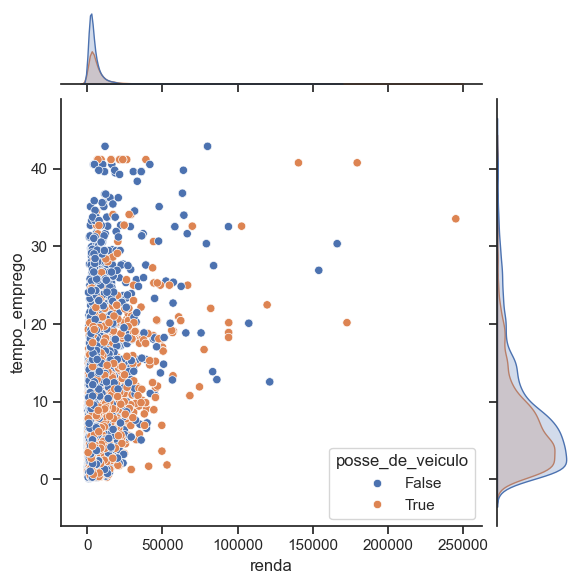

In [6]:
sns.set_theme(style='ticks')
sns.jointplot(data=renda, x='renda', y='tempo_emprego', hue='posse_de_veiculo')
plt.show()

Mesmo com um grafico de dispersão fica dificil observar essa correlação.

Está nítido a necessidade de preparação desses dados para conseguirmos visualizar com clareza.

---

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



Vamos rever os dados que temos.

Coluna | Tipo de dado | Obs
:------|:------------:|:----:
Unnamed: 0 | int64 | Essa coluna é apenas o index dos dados, vamos retirar do nosso modelo pois ela não agregará em nada.
data_ref | object | A data é algo importante ao analisar séries temporais, porém, esse não é nosso objetivo com esse modelo, vamos retirar ela tbm.
id_cliente | int64 | Como a coluna de index, esse id do cliente não será necessario, vamos retira-lo também.
sexo | object | Uma variável com F e M, como boa pratica, vamos atribuir um 1 para Feminino e 0 para Masculino para nosso modelo entender de maneira correta essa variável.
posse_de_veiculo | bool | Um booleano, sem problemas, mas como uma boa pratica, vamos atribuir valores com 0 e 1.
posse_de_imovel | bool | Mesma situação da posse_de_veiculo, vamos atribuir valores com 0 e 1.
qtd_filhos | int64 | Tudo certo com essa variavel.
tipo_renda | object | Uma variável qualitativa nominal, vamos usar o One-Hot Encoding(Dummies).
educacao | object | Uma variável qualitativa ordinal, aqui vamos usar uma técnica diferente e mais eficiente para nosso modelo, Codificação ordinal.
estado_civil | object | Uma variável qualitativa nominal, vamos usar o One-Hot Encoding(Dummies).
tipo_residencia | object | Uma variável qualitativa nominal, vamos usar o One-Hot Encoding(Dummies).
idade | int64 | Tudo certo com a idade, não possúi outliers, vamos manter ela como está.
tempo_emprego | float64 | Aparentemente tudo correto por aqui, detalhe de alguns valores faltantes como discutido anteriormente.
qt_pessoas_residencia | float64 | Tudo certo por aqui também.
renda | float64 | Nossa variável alvo, vamos aplicar uma técnica nela e em outras variáveis para "Normalizar" essas curvas muitos acentuadas.

In [7]:
df_encoded = renda.drop(columns=['Unnamed: 0', 'data_ref', 'id_cliente']).copy()

Com os dados selecionados, vamos tratar alguns dados faltantes da variável Tempo de emprego.

In [8]:
df_encoded.loc[df_encoded['tipo_renda'] == 'Pensionista', 'tempo_emprego']

11            NaN
12            NaN
21            NaN
22            NaN
23            NaN
           ...   
14982    7.520548
14984         NaN
14986         NaN
14991         NaN
14996         NaN
Name: tempo_emprego, Length: 2582, dtype: float64

Como observado, pensionistas tem tempo de emprego como dados faltantes, alguns pensionistas possuem algum tempo de emprego mas, por serem poucos dados, vamos tratar todos como **[-1]**.

Por que **[-1]**? porque não **[0]**?

A ideia de atribuir **[0]** é profissional, padrão de mercado e muito robusta. Dado que temos a coluna tipo_renda para contextualizar, é uma escolha excelente, porém, atribuir **[-1]** é uma prática um pouco mais defensiva que garante que não haverá nenhuma colisão de significado com outros valores **[0]**

In [9]:
df_encoded.loc[df_encoded['tipo_renda'] == 'Pensionista', 'tempo_emprego'] = \
    df_encoded.loc[df_encoded['tipo_renda'] == 'Pensionista', 'tempo_emprego'].fillna(-1)

df_encoded.loc[df_encoded['tipo_renda'] == 'Pensionista', 'tempo_emprego'].value_counts()

tempo_emprego
-1.000000     2573
 7.520548        3
 10.082192       3
 6.049315        1
 3.630137        1
 1.605479        1
Name: count, dtype: int64

Vamos normalizar nossa variável renda utilizando o np.log.

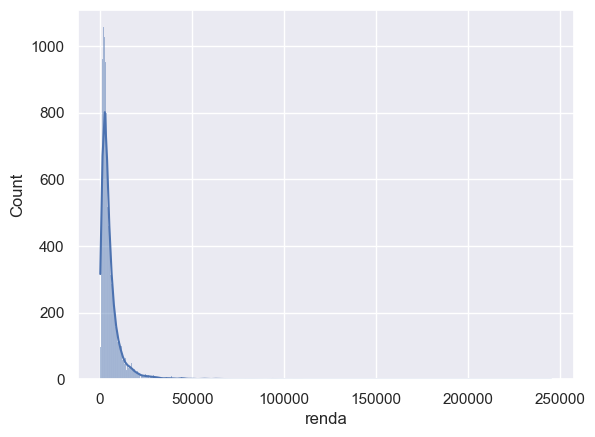

In [10]:
sns.set_theme('notebook')
sns.histplot(df_encoded, x='renda', kde=True)
plt.show()

In [11]:
df_encoded['renda_log'] = np.log1p(df_encoded['renda'])

Agora, como visto no histograma abaixo, temos nossa variável renda no formato de logaritimo e sem a influência de forte de outliers.

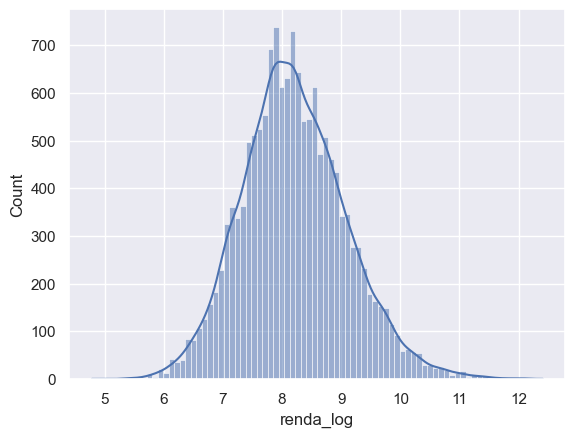

In [12]:
sns.set_theme('notebook')
sns.histplot(df_encoded, x='renda_log', kde=True)
plt.show()

Vamos criar uma lista para a ordem da escolaridade e criar uma ordinalidade para a variavel de *'educacao'*

In [13]:
print(df_encoded.educacao.unique().tolist())
ordem_escolaridade = [
    'Primário',
    'Secundário',
    'Superior incompleto',
    'Superior completo',
    'Pós graduação'
]

['Secundário', 'Superior completo', 'Superior incompleto', 'Primário', 'Pós graduação']


In [14]:
mapa_escolaridade = {nivel: i for i, nivel in enumerate(ordem_escolaridade)}

df_encoded['educacao_ordinal'] = df_encoded['educacao'].map(mapa_escolaridade)

print(df_encoded[['educacao', 'educacao_ordinal']].head())

            educacao  educacao_ordinal
0         Secundário                 1
1  Superior completo                 3
2  Superior completo                 3
3  Superior completo                 3
4         Secundário                 1


Nossa ordinalidade ficou assim:

Educação | Valor ordinal
---------|:------------:
'Primário' | 0
'Secundário' | 1
'Superior incompleto' | 2
'Superior completo' | 3
'Pós graduação' | 4

In [15]:
df_encoded.drop(columns=['educacao', 'renda'], inplace=True)

Vamos criar as dummies, padronizar todos os valores para numéricos.

In [16]:
df_encoded = pd.get_dummies(df_encoded, drop_first=True, dtype=int)

In [17]:
df_encoded.posse_de_imovel = df_encoded.posse_de_imovel.astype(int)
df_encoded.posse_de_veiculo = df_encoded.posse_de_veiculo.astype(int)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   posse_de_veiculo               15000 non-null  int64  
 1   posse_de_imovel                15000 non-null  int64  
 2   qtd_filhos                     15000 non-null  int64  
 3   idade                          15000 non-null  int64  
 4   tempo_emprego                  15000 non-null  float64
 5   qt_pessoas_residencia          15000 non-null  float64
 6   renda_log                      15000 non-null  float64
 7   educacao_ordinal               15000 non-null  int64  
 8   sexo_M                         15000 non-null  int64  
 9   tipo_renda_Bolsista            15000 non-null  int64  
 10  tipo_renda_Empresário          15000 non-null  int64  
 11  tipo_renda_Pensionista         15000 non-null  int64  
 12  tipo_renda_Servidor público    15000 non-null 

In [18]:
corr_encoded = df_encoded.corr()
corr_encoded[['renda_log']].sort_values('renda_log')

,renda_log
tipo_renda_Pensionista,-0.145184
estado_civil_Viúvo,-0.060782
estado_civil_União,-0.027708
estado_civil_Solteiro,-0.025209
tipo_residencia_Comunitário,-0.012287
estado_civil_Separado,-0.011008
tipo_residencia_Com os pais,-0.009718
tipo_residencia_Governamental,-0.007764
idade,-0.001178
tipo_residencia_Casa,0.000938


Com esse tratamento observamos que a correlação parece ser mais interessante com a variavel renda.

Com isso terminamos nossa limpeza e preparação dos dados.

---

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


### Rodando o modelo


Vamos separar nossa base de testes entre variaveis independentes, ***X***, e variavel alvo ***y***

In [19]:
X = df_encoded.drop(columns=['renda_log'], axis=1).copy()
y = df_encoded['renda_log'].copy()

Nossa base possui 15.000 registros.
Optamos por utilizar 80% dos dados para treino (12.000 registros) e 20% para teste (3.000 registros).

Essa divisão garante que o modelo tenha dados suficientes para aprender e, ao mesmo tempo, que possamos avaliar seu desempenho em situações novas, simulando cenários reais.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=4)

Execução (Treinamento) do Modelo

Nesta etapa, ensinamos o modelo de Machine Learning a reconhecer padrões nos dados.

- O algoritmo Random Forest cria diversas árvores de decisão, cada uma aprendendo padrões diferentes da base.

- Essas árvores são combinadas para gerar um resultado final mais robusto e confiável (daí o nome floresta aleatória).

Em resumo: executar o modelo significa treinar a Random Forest para entender o comportamento dos clientes a partir do histórico fornecido.

In [21]:
modelo_1 = RandomForestRegressor(random_state=4).fit(X_train, y_train)

In [22]:
r2 = modelo_1.score(X_test, y_test)
print(f'O R² do modelo é {r2}')

O R² do modelo é 0.44155506835137404


A sequencia de código abaixo é uma onde de loops e arvores onde busco alcançar o melhor resultado de R² dentre um intervalo de hiperparametros.

São uma sequência de varios loops pois para nao ter que rodar milhares de arvores, eu faço uma "escada" para alcançar o melhor resultado.

In [23]:
r2s = []
indicador_profundidade = []
indicador_folha = []

for profundidade in range(1, 92, 10):
    for folha in range (1, 92, 10):
        modelo = RandomForestRegressor(max_depth = profundidade, min_samples_leaf=folha, random_state=4)
        modelo.fit(X_train, y_train)
        r2 = modelo.score(X_test, y_test)
        r2s.append(r2)
        indicador_profundidade.append(profundidade)
        indicador_folha.append(folha)

n_minimo,1,11,21,31,41,51,61,71,81,91
profundidade,,,,,,,,,,
1,0.165489,0.165489,0.165489,0.165489,0.165489,0.165489,0.165489,0.165489,0.165489,0.165489
11,0.439082,0.414885,0.400683,0.392692,0.387435,0.384381,0.381248,0.378638,0.376303,0.375110
21,0.445047,0.421715,0.403386,0.393761,0.388048,0.384599,0.381380,0.378717,0.376374,0.375166
31,0.441771,0.421635,0.403363,0.393761,0.388048,0.384599,0.381380,0.378717,0.376374,0.375166
41,0.441555,0.421635,0.403363,0.393761,0.388048,0.384599,0.381380,0.378717,0.376374,0.375166
51,0.441555,0.421635,0.403363,0.393761,0.388048,0.384599,0.381380,0.378717,0.376374,0.375166
61,0.441555,0.421635,0.403363,0.393761,0.388048,0.384599,0.381380,0.378717,0.376374,0.375166
71,0.441555,0.421635,0.403363,0.393761,0.388048,0.384599,0.381380,0.378717,0.376374,0.375166
81,0.441555,0.421635,0.403363,0.393761,0.388048,0.384599,0.381380,0.378717,0.376374,0.375166


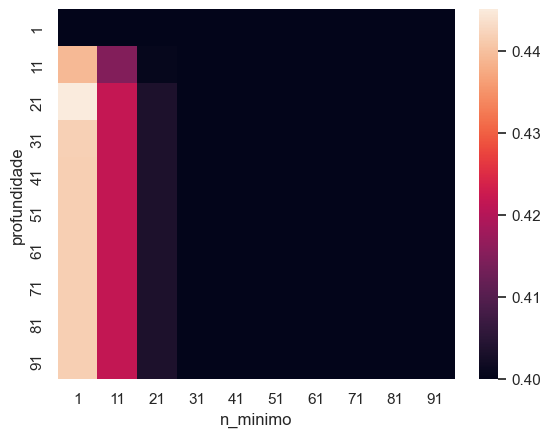

In [24]:
renda_r2 = pd.DataFrame({'r2': r2s, 'profundidade': indicador_profundidade, 'n_minimo': indicador_folha})
sns.heatmap(renda_r2.pivot(index='profundidade',
            columns='n_minimo', values='r2'), vmin=.4)
renda_r2.pivot(index='profundidade', columns='n_minimo', values='r2')

In [25]:
melhor_r2 = 0
pivot_df = renda_r2.pivot(index='profundidade', columns='n_minimo', values='r2')
for folha in pivot_df.columns:
    for profundidade in pivot_df.index:
        if pivot_df.loc[profundidade, folha] > melhor_r2:
            melhor_folha, melhor_profundidade, melhor_r2 = folha, profundidade, pivot_df.loc[profundidade, folha]
            print(melhor_folha, melhor_profundidade, melhor_r2)

1 1 0.16548948504875338
1 11 0.4390824225101496
1 21 0.44504710482837184


In [26]:
r2s = []                               
indicador_profundidade = []
indicador_folha = []

for profundidade in range(max(melhor_profundidade - 11, 0)+1, melhor_profundidade+11, 3):
    for folha in range (max(melhor_folha-11, 0)+1, melhor_folha+11, 3):
        modelo = RandomForestRegressor(max_depth = profundidade, min_samples_leaf=folha, random_state=4)
        modelo.fit(X_train, y_train)
        r2 = modelo.score(X_test, y_test)
        r2s.append(r2)
        indicador_profundidade.append(profundidade)
        indicador_folha.append(folha)

n_minimo,1,4,7,10
profundidade,,,,
11,0.439082,0.429256,0.422707,0.416485
14,0.453852,0.441653,0.432192,0.423254
17,0.453034,0.444256,0.434677,0.424733
20,0.447127,0.444221,0.434415,0.424747
23,0.443500,0.443917,0.434301,0.424678
26,0.441551,0.443819,0.434320,0.424672
29,0.441032,0.443794,0.434319,0.424664


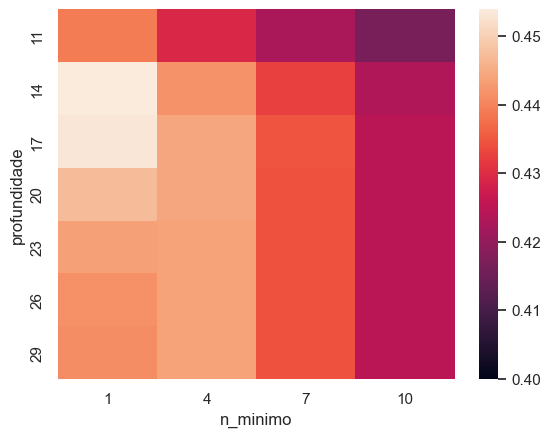

In [27]:
renda_r2 = pd.DataFrame({'r2': r2s, 'profundidade': indicador_profundidade, 'n_minimo': indicador_folha})
sns.heatmap(renda_r2.pivot(index='profundidade',
            columns='n_minimo', values='r2'), vmin=.4)
renda_r2.pivot(index='profundidade', columns='n_minimo', values='r2')

In [28]:
melhor_r2 = 0
pivot_df = renda_r2.pivot(index='profundidade', columns='n_minimo', values='r2')
for folha in pivot_df.columns:
    for profundidade in pivot_df.index:
        if pivot_df.loc[profundidade, folha] > melhor_r2:
            melhor_folha, melhor_profundidade, melhor_r2 = folha, profundidade, pivot_df.loc[profundidade, folha]
            print(melhor_folha, melhor_profundidade, melhor_r2)

1 11 0.4390824225101496
1 14 0.45385213666933877


In [29]:
r2s = []
indicador_profundidade = []
indicador_folha = []

for profundidade in range(max(melhor_profundidade-3, 0)+1, melhor_profundidade+4):
    for folha in range (max(melhor_folha-3, 0)+1, melhor_folha+4):
        modelo = RandomForestRegressor(max_depth = profundidade, min_samples_leaf=folha, random_state=4)
        modelo.fit(X_train, y_train)
        r2 = modelo.score(X_test, y_test)
        r2s.append(r2)
        indicador_profundidade.append(profundidade)
        indicador_folha.append(folha)

n_minimo,1,2,3,4
profundidade,,,,
12,0.448129,0.442773,0.438854,0.435402
13,0.452194,0.447012,0.443442,0.439218
14,0.453852,0.448734,0.445362,0.441653
15,0.454528,0.450092,0.447049,0.443806
16,0.453212,0.450574,0.448222,0.444656
17,0.453034,0.450420,0.448232,0.444256


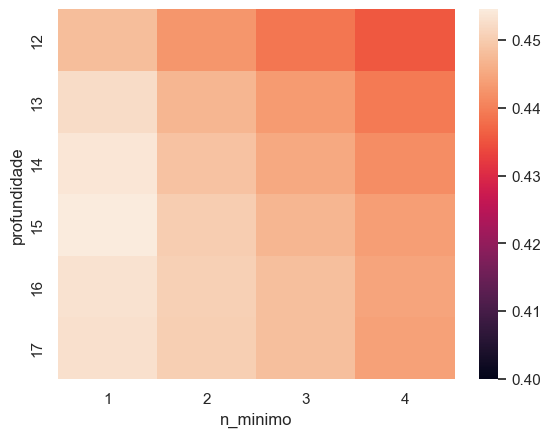

In [30]:
renda_r2 = pd.DataFrame({'r2': r2s, 'profundidade': indicador_profundidade, 'n_minimo': indicador_folha})
sns.heatmap(renda_r2.pivot(index='profundidade',
            columns='n_minimo', values='r2'), vmin=.4)
renda_r2.pivot(index='profundidade', columns='n_minimo', values='r2')

In [31]:
melhor_r2 = 0
pivot_df = renda_r2.pivot(index='profundidade', columns='n_minimo', values='r2')
for folha in pivot_df.columns:
    for profundidade in pivot_df.index:
        if pivot_df.loc[profundidade, folha] > melhor_r2:
            melhor_folha, melhor_profundidade, melhor_r2 = folha, profundidade, pivot_df.loc[profundidade, folha]
            print(melhor_folha, melhor_profundidade, melhor_r2)

1 12 0.44812917292307175
1 13 0.45219433937030384
1 14 0.45385213666933877
1 15 0.4545275609532504


Com isso consigo o melhor resultado para o min_sample_leaf, e para o max_depth.
-   min_sample_leaf = **1**
-   max_depth = **15**

In [32]:
modelo = RandomForestRegressor(max_depth=melhor_profundidade, min_samples_leaf=melhor_folha, random_state=4)
modelo.fit(X_train, y_train)

r2_modelo = modelo.score(X_test, y_test)
print(f'O R² do modelo alcançado foi de: {r2_modelo:.4f}')

O R² do modelo alcançado foi de: 0.4545


Caso seja necessário rodar refazer o modelo com novos dados para treino, esse código vai alcançar os hiperparametros com os melhores R² de maneira automatica.

## Etapa 5 Crisp-DM: Avaliação dos resultados


    O cross_val_score do scikit-learn é usado para rodar a validação cruzada do modelo — ou seja, treinar e avaliar várias vezes em diferentes divisões dos dados, obtendo uma média mais confiável do desempenho.

In [33]:
scores = cross_val_score(modelo, X, y, cv=10, scoring="r2")
print("R² em cada fold:", scores)
print("\nR² médio:", scores.mean())
print("Desvio padrão:", scores.std())

R² em cada fold: [0.44394104 0.44416678 0.49463357 0.46406506 0.45003565 0.44312096
 0.46839117 0.4404872  0.45064252 0.41143069]

R² médio: 0.45109146287266155
Desvio padrão: 0.020525254581507533


Para avaliar a performance do modelo de regressão, foi empregada a técnica de validação cruzada com 10 folds. O modelo alcançou um Coeficiente de Determinação (R²) médio de 0.451 com um desvio padrão de 0.020.

Este resultado é impactante pois indica que, em média, o modelo é capaz de explicar 45.1% da variabilidade presente nos dados. Em outras palavras, as variáveis que utilizamos como preditoras são altamente eficazes para prever a nossa variável-alvo, a ***Renda***.

O baixo desvio padrão de 0.022 entre os 10 testes da validação cruzada demonstra a estabilidade e a consistência do modelo. Isso significa que sua performance não varia drasticamente ao ser exposto a diferentes subconjuntos de dados, o que nos dá alta confiança de que ele se comportará de maneira semelhante com dados futuros.

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.